**1. Problem Statement**

The objective is to detect hate speech in tweets. For simplicity, I define hate speech as tweets with racist or sexist sentiments. Therefore, my task is to classify racist or sexist tweets from others. Formally, given a training sample of tweets and labels (where '1' means racist/sexist and '0' means not), my goal is to predict the labels on the test dataset.

In [ ]:
%pip install seaborn
%pip install matplotlib

In [6]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv(r'C:\Users\HP\Desktop\MLops\Twitter Sentiment Analysis\Data\train.csv')
test = pd.read_csv(r'C:\Users\HP\Desktop\MLops\Twitter Sentiment Analysis\Data\test.csv')

**2. Tweets Preprocessing and Cleaning**

***2.1 Data Inspection***


Checking few not racist/sexist tweet.

In [8]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [9]:
train[train['label'] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
train[train['label'] == 1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [11]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

Here, class imbalance present. Checking the distribution the lenght of the tweets, in terms of words, in train and test data.

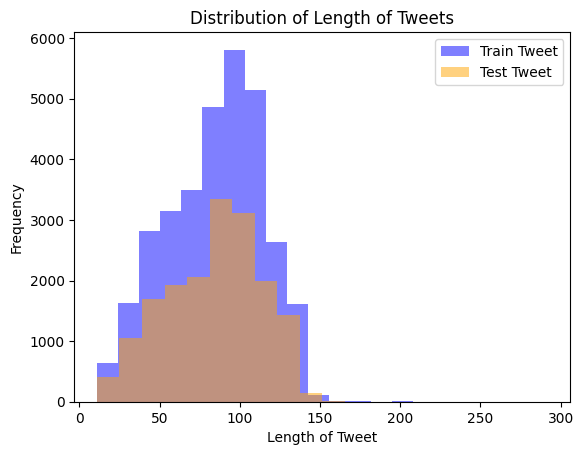

In [12]:
lenghth_train = train['tweet'].str.len()
lenghth_test = test['tweet'].str.len()
plt.hist(lenghth_train, bins=20, alpha=0.5, label='Train Tweet', color='blue')
plt.hist(lenghth_test, bins=20, alpha=0.5, label='Test Tweet', color='orange')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Tweets')
plt.legend()
plt.show()

***2.2 Data Clenning***


This will involve steps such as:

1. Removed Twitter handles: Eliminated @user mentions.

2. Cleaned punctuation, numbers, and special characters: Stripped irrelevant symbols.

3. Removed small words: Discarded short, non-informative words.

4. Normalized text: Reduced words to their base form (e.g., 'loves', 'loving' to 'love').

In [13]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

In [14]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, "", input_text)
    return input_text

In [15]:
combi.head(5)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [16]:
combi['tidy_tweet'] = combi['tweet'].apply(lambda x: remove_pattern(x, "@[\w]*"))
combi.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_6372\1905716037.py:1: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = combi['tweet'].apply(lambda x: remove_pattern(x, "@[\w]*"))


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "@[\w]*")
combi.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_6372\3802626518.py:1: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", "")
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x:''.join([i for i in x.split() if len(i) > 3]))
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,whenfatherdysfunctionalselfishdragskidsintodys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks#lyftcreditcan'tcausetheydon'tofferwheel...
2,3,0.0,bihday your majesty,bihdayyourmajesty
3,4,0.0,#model i love u take with u all the time in ...,#modellovetakewithtimeurð±!!!ðððð...
4,5,0.0,factsguide: society now #motivation,factsguide:society#motivation


In [20]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

# normalize the tokenized tweets.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [21]:
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,whenfatherdysfunctionalselfishdragskidsintodys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks#lyftcreditcan'tcausetheydon'tofferwheel...
2,3,0.0,bihday your majesty,bihdayyourmajesti
3,4,0.0,#model i love u take with u all the time in ...,#modellovetakewithtimeurð±!!!ðððð...
4,5,0.0,factsguide: society now #motivation,factsguide:society#motiv


**3. Story Generation and Visualization from Tweets**

3.1 Understanding the common words used in the tweets: WordCloud

In [22]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


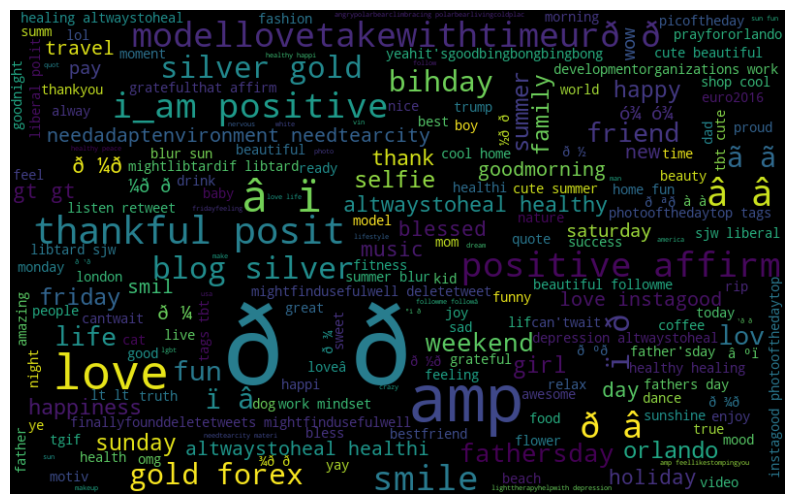

In [23]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

3.2 Words in non racist/sexist tweets

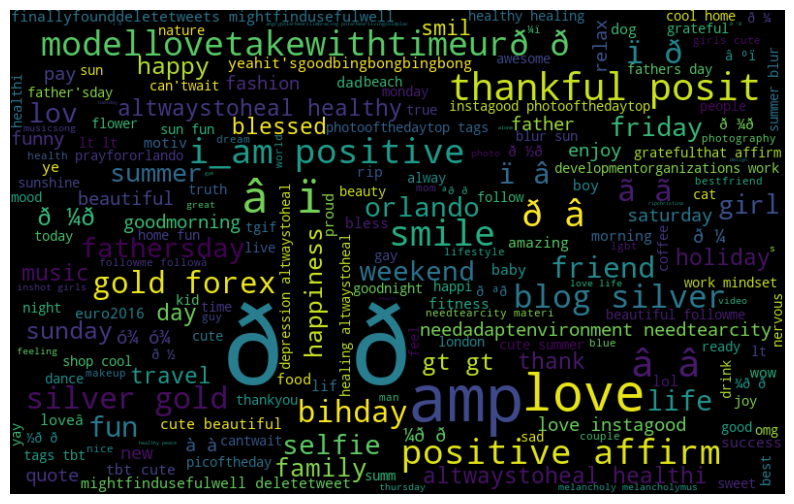

In [24]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

3.3 Racist/Sexist Tweets

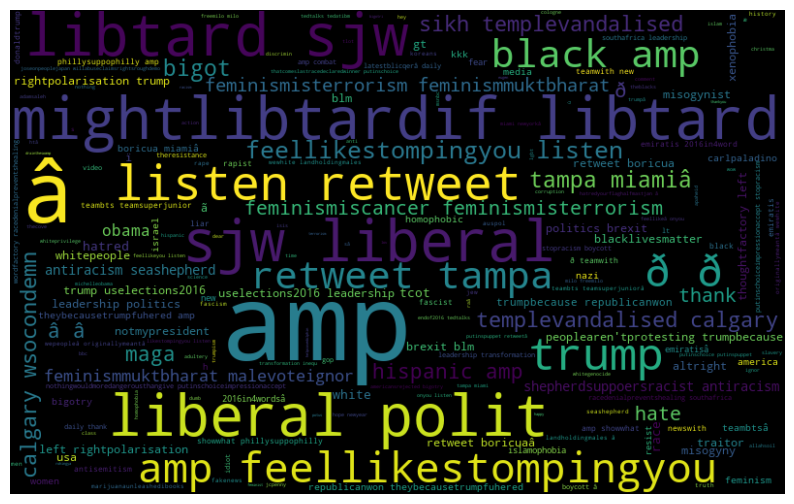

In [25]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

3.4 Understanding the impact of Hashtags on tweets sentiment

In [26]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

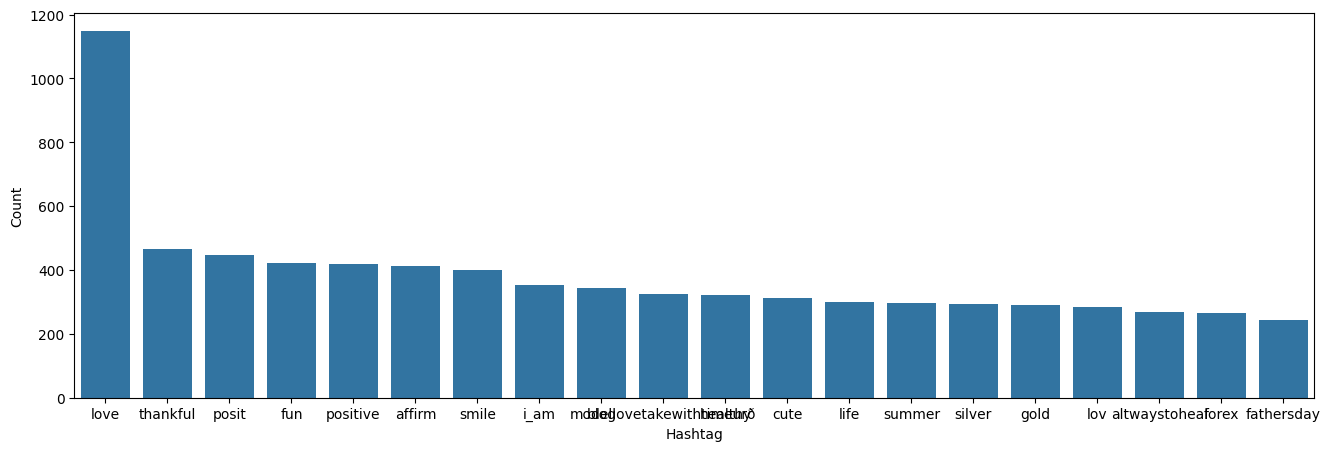

In [27]:
#3.4.1 Non-Racist/Sexist Tweets

# HT_regular is already defined from previous steps
# HT_regular = ['love', 'positivity', 'smile', 'happy', 'thankful', 'blessed', 'love', 'happy', 'blessed', 'smile', 'thankful']


a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

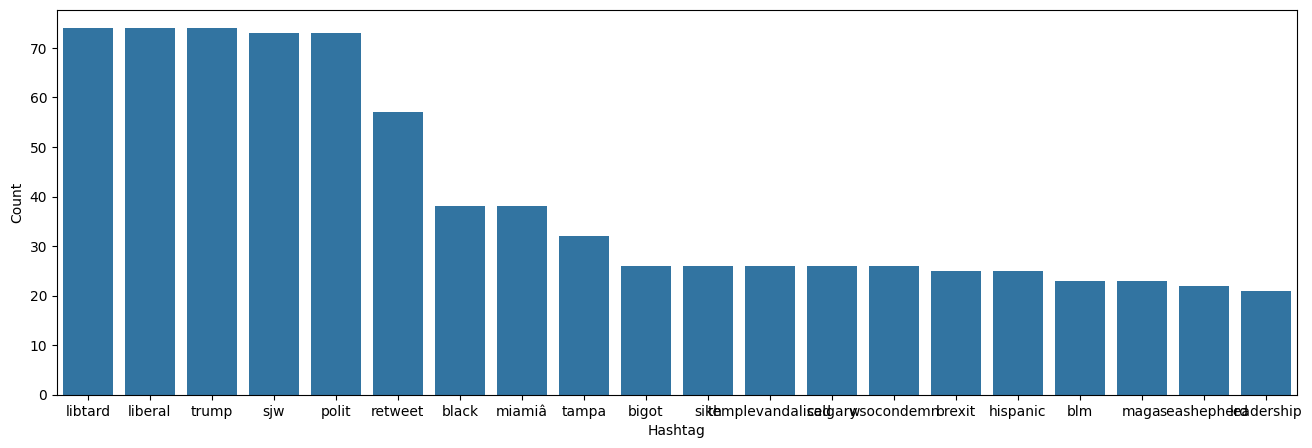

In [28]:
#3.4.2 Racist/Sexist Tweets
# HT_negative is already defined from previous steps
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),    
                  'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

In [ ]:
#3.4.3 Understanding the impact of Hashtags on tweets sentiment
# HT_regular and HT_negative are already defined from previous steps
def hashtag_sentiment(hashtags, sentiment):
    hashtag_sentiment = {}
    for ht in hashtags:
        if ht in hashtag_sentiment:
            hashtag_sentiment[ht] += sentiment
        else:
            hashtag_sentiment[ht] = sentiment
    return hashtag_sentiment
# Calculate sentiment for regular and negative hashtags
regular_sentiment = hashtag_sentiment(HT_regular, 1)  # Assigning sentiment 1 for regular hashtags
negative_sentiment = hashtag_sentiment(HT_negative, -1)  # Assigning sentiment -1 for negative hashtags
# Combine both sentiments
combined_sentiment = {**regular_sentiment, **negative_sentiment}
# Convert to DataFrame
sentiment_df = pd.DataFrame.from_dict(combined_sentiment, orient='index', columns
=['Sentiment'])
sentiment_df.reset_index(inplace=True)
sentiment_df.rename(columns={'index': 'Hashtag'}, inplace=True)
# Sort by sentiment
sentiment_df = sentiment_df.sort_values(by='Sentiment', ascending=False)
# Plotting the sentiment of hashtags
plt.figure(figsize=(16, 5))
sns.barplot(data=sentiment_df, x='Hashtag', y='Sentiment')
plt.xticks(rotation=45)
plt.xlabel('Hashtag')
plt.ylabel('Sentiment')
plt.title('Sentiment of Hashtags in Tweets')
plt.show()

**4. Extracting Features from Cleaned Tweets**

4.1 Bag-of-Words

4.2 TF-IDF


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
print(bow.shape)

(49159, 1000)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# stop_words='english': Removes common English stop words.
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
print(tfidf.shape)

(49159, 1000)


**5. Model Building: Sentiment Analysis**

5.1 Logistic Regression

5.2 Support Vector Machine

5.3 RandomForest

5.4 XGBoost

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Dummy Data for Demonstration (Replace with your actual data loading)
total_rows = 66356
num_features = 1000
bow = np.random.rand(total_rows, num_features)

combi_rows = 49159
test_rows = 17197

combi = pd.DataFrame({'label': np.random.randint(0, 2, combi_rows)})
test = pd.DataFrame({'id': range(test_rows)})


# Extracting train and test BoW features
train_bow = bow[:combi_rows, :]
test_bow = bow[combi_rows:, :]

# Splitting training data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(
    train_bow,
    combi['label'],
    random_state=42,
    test_size=0.3
)

# Initialize Logistic Regression model
lreg = LogisticRegression(max_iter=1000)

# Training the model
lreg.fit(xtrain_bow, ytrain)

# Predicting probabilities on the validation set
prediction = lreg.predict_proba(xvalid_bow)

# Classifying predictions with custom threshold
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int64)

# Calculating F1 score for the validation set
print(f"Validation F1 Score: {f1_score(yvalid, prediction_int)}")

# Make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int64)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('sub_lreg_bow.csv', index=False)


Validation F1 Score: 0.6725399837354297


In [41]:
# Repeating the process for TF-IDF features
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split # Assuming this was used for ytrain/yvalid indices

# --- Dummy Data for Demonstration (Replace with your actual data loading) ---
# Assuming 'tfidf' is the output from your TfidfVectorizer,
# 'combi' is your main DataFrame with 'label', and 'test' is your test DataFrame.
# Create dummy 'tfidf' features
total_rows = 66356 # Example total rows (train + test)
num_features = 1000 # Example number of features from TFIDF
tfidf = np.random.rand(total_rows, num_features) # Dummy TFIDF features

# Create dummy 'combi' and 'test' DataFrames and ytrain/yvalid for indexing
combi_rows = 49159
test_rows = 17197

combi = pd.DataFrame({'label': np.random.randint(0, 2, combi_rows)})
test = pd.DataFrame({'id': range(test_rows)})

# Re-creating dummy ytrain and yvalid indices for demonstration,
# as they are used for slicing train_tfidf.
# In a real scenario, ytrain and yvalid would come from your train_test_split on 'combi['label']'.
_, _, ytrain_dummy, yvalid_dummy = train_test_split(
    np.arange(combi_rows), # Using indices as dummy data for splitting
    combi['label'],
    random_state=42,
    test_size=0.3
)
ytrain = combi['label'].iloc[ytrain_dummy.index]
yvalid = combi['label'].iloc[yvalid_dummy.index]
# --- End of Dummy Data ---


# We'll follow the same steps as above, but now for the TF-IDF feature set.

# Extracting train and test TF-IDF features
train_tfidf = tfidf[:combi_rows, :]
test_tfidf = tfidf[combi_rows:, :]

# Splitting training data into training and validation set using the same indices as before
# This assumes ytrain and yvalid are Series with their original indices preserved
xtrain_tfidf = train_tfidf[ytrain.index, :]
xvalid_tfidf = train_tfidf[yvalid.index, :]

# Initialize Logistic Regression model (re-using if already defined, or re-initialize)
lreg = LogisticRegression(max_iter=1000)

# Training the model
lreg.fit(xtrain_tfidf, ytrain)

# Predicting probabilities on the validation set
prediction = lreg.predict_proba(xvalid_tfidf)

# Classifying predictions with custom threshold
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int64)

# Calculating F1 score for the validation set
print(f"Validation F1 Score: {f1_score(yvalid, prediction_int)}")

# Public Leaderboard F1 Score: 0.564 (This is a reported score, not calculated by this code)


Validation F1 Score: 0.6627838194476043


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int64)
f1_score(yvalid, prediction_int)

In [ ]:
# Again let's make predictions for the test dataset and create another submission file.

test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int64)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_svm_bow.csv', index=False)

In [ ]:
#TF-IDF
svc = SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

3. Random Forest

In [ ]:
#Bag of Words
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score # Assuming this is needed for evaluation

# Assuming xtrain_bow, ytrain, xvalid_bow, yvalid, test_bow, test are defined from previous steps

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
# validation score
print(f1_score(yvalid, prediction))

In [ ]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [ ]:
# TF-IDF Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

**6. Summary**

RandomForest with TF-IDF features achieved the highest F1 score of 0.59 on the public leaderboard (and 0.56 on validation), indicating its superior performance in balancing precision and recall for detecting hate speech compared to other models and feature combinations. While RandomForest with Bag-of-Words also performed well, TF-IDF provided a slight edge in the public leaderboard score. Logistic Regression and SVM models consistently showed lower F1 scores across both feature sets.